<a href="https://colab.research.google.com/github/YasithSubasinghe/ML_IRIS_Classification/blob/main/IRIS_SVM_CLASSIFIER.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importing necessary libraries
from sklearn.model_selection import train_test_split  # Used to split data into training and testing sets
import pandas as pd  # Library for working with data frames
from sklearn.datasets import load_iris  # Importing the Iris dataset
import matplotlib.pyplot as plt  # Library for plotting

In [ ]:
# Load Iris dataset
iris = load_iris()

In [ ]:
# Print Iris dataset attributes
dir(iris)
# iris.data contains the feature values (length and width measurements)
# iris.target contains the target labels (species)
# iris.target_names contains the names of the target labels

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [ ]:
# Print Iris dataset attributes
print("Attributes of the Iris dataset:")
print("iris.data shape:", iris.data.shape)  # Shape of feature data //150 rows(sample) 4 coloums(features)
print("iris.target shape:", iris.target.shape)  # Shape of target data
print("iris.feature_names:", iris.feature_names)  # Names of features
print("iris.target_names:", iris.target_names)  # Names of target labels

Attributes of the Iris dataset:
iris.data shape: (150, 4)
iris.target shape: (150,)
iris.feature_names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
iris.target_names: ['setosa' 'versicolor' 'virginica']


In [ ]:
# Creating a DataFrame using the Iris dataset
df = pd.DataFrame(iris.data, columns=iris.feature_names)  # Creating DataFrame with feature columns
df['target'] = iris.target  # Adding target column to the DataFrame

In [ ]:
print(df.head())  # Display the first few rows of the DataFrame

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  


In [ ]:
# Adding a column with the flower names for better understanding
df['flower_name'] = df.target.apply(lambda x: iris.target_names[x])

In [ ]:
print(df.sample(5))  # Display a random sample of 5 rows from the DataFrame

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
11                 4.8               3.4                1.6               0.2   
60                 5.0               2.0                3.5               1.0   
120                6.9               3.2                5.7               2.3   
137                6.4               3.1                5.5               1.8   
103                6.3               2.9                5.6               1.8   

     target flower_name  
11        0      setosa  
60        1  versicolor  
120       2   virginica  
137       2   virginica  
103       2   virginica  


In [ ]:
# Splitting the DataFrame into subsets based on the target labels
df0 = df[:50]  # Setosa
df1 = df[50:100]  # Versicolor
df2 = df[100:]  # Virginica

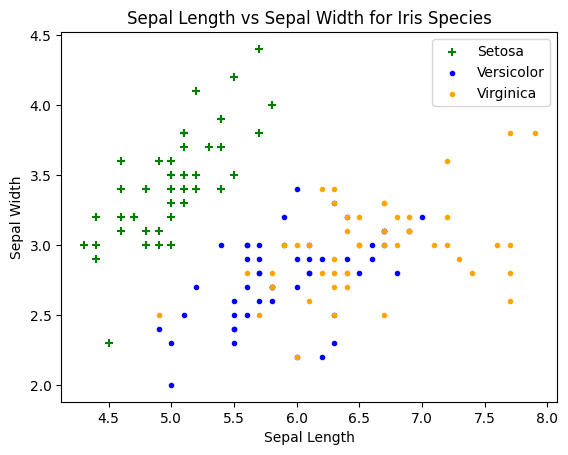

In [ ]:
# Plotting the Sepal Length vs Sepal Width for each species
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.scatter(df0['sepal length (cm)'], df0['sepal width (cm)'], color="green", marker='+', label='Setosa')
plt.scatter(df1['sepal length (cm)'], df1['sepal width (cm)'], color="blue", marker='.', label='Versicolor')
plt.scatter(df2['sepal length (cm)'], df2['sepal width (cm)'], color="orange", marker='.', label='Virginica')
plt.legend()  #explain meaning of colors
plt.title('Sepal Length vs Sepal Width for Iris Species')
plt.show()

In [ ]:
# Splitting the dataset into feature variables (X) and target variable (y)
X = df.drop(['target', 'flower_name'], axis='columns')
y = df.target

In [ ]:
# Printing the feature variables (X) and target variable (y)
print("Feature variables (X):")
print(X.sample(5))  # Display random 5 rows of X
print("\nTarget variable (y):")
print(y.sample(5))  # Display random 5 rows of y

Feature variables (X):
     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
123                6.3               2.7                4.9               1.8
134                6.1               2.6                5.6               1.4
124                6.7               3.3                5.7               2.1
125                7.2               3.2                6.0               1.8
81                 5.5               2.4                3.7               1.0

Target variable (y):
117    2
54     1
79     1
100    2
10     0
Name: target, dtype: int64


In [ ]:
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  # 80% training, 20% testing
print("Size of training set:", len(X_train))
print("Size of testing set:", len(X_test))

Size of training set: 120
Size of testing set: 30


In [ ]:
# Training a Support Vector Classifier (SVC) model
from sklearn.svm import SVC  # Importing the Support Vector Classifier (SVC) class from scikit-learn
model = SVC()  # Instantiating an SVC object
model.fit(X_train, y_train)  # Training the model using the training data


SVC()

In [ ]:
# Evaluating the model's accuracy on the testing set
accuracy = model.score(X_test, y_test)
print("Model Accuracy:", accuracy)

Model Accuracy: 1.0


In [ ]:
# Predicting the species for a new sample
sample = [[4.8, 3.0, 1.5, 0.3]]  # New sample with Sepal length, Sepal width, Petal length, Petal width
predicted_species = model.predict(sample)  # Predicting the species using the trained model
predicted_species_name = iris.target_names[predicted_species[0]]  # Getting the name of the predicted species
print("Predicted Species for sample {}: {}".format(sample, predicted_species_name))  # Printing the predicted species

Predicted Species for sample [[4.8, 3.0, 1.5, 0.3]]: setosa


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [ ]:
# Training a Support Vector Classifier (SVC) model with a different value of C
model_C = SVC(C=1)  # C parameter controls the trade-off between smooth decision boundary and classifying training points correctly
model_C.fit(X_train, y_train)

SVC(C=1)

In [ ]:
# Evaluating the accuracy of the new model
accuracy_C = model_C.score(X_test, y_test)
print("Model Accuracy (with C=1):", accuracy_C)

Model Accuracy (with C=1): 1.0
